<a href="https://colab.research.google.com/github/Katonokatono/Suicide/blob/EDA/EDA_Suicide_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
!pip install nltk

In [79]:
#importing libraries
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from nltk import FreqDist
#for text pre-processing
import re, string

In [80]:
#loading files
eda = pd.read_csv("/content/final_data_suicide.csv")
eda.head()

,Unnamed: 0,friends_count,followers_count,statuses_count,created_at,retweet_count,label,town,clean_text
0,1,182,83,6950,09/14/2021 7:47,0,anxiety,burundi,bunmo multi item stretchy string fidget toy pk...
1,2,983,915,12944,09/14/2021 7:31,0,anxiety,kenya,unkonfined basic motivation behind behavior bi...
2,3,281,63,290,09/14/2021 7:30,0,anxiety,nairobi,munenekimathi zablonorina bp normal yes check ...
3,4,220,2052,37982,09/14/2021 7:02,0,anxiety,nairobi kenya,deal anxious share experience anxiety yvonne m...
4,5,857,272,650,09/14/2021 7:00,2,general tweet,nairobi,know dry spell cause anxiety depression even s...


In [81]:
#checking the top of the dataframe
eda.drop(['Unnamed: 0'],axis=1,inplace=True)
eda.head()

,friends_count,followers_count,statuses_count,created_at,retweet_count,label,town,clean_text
0,182,83,6950,09/14/2021 7:47,0,anxiety,burundi,bunmo multi item stretchy string fidget toy pk...
1,983,915,12944,09/14/2021 7:31,0,anxiety,kenya,unkonfined basic motivation behind behavior bi...
2,281,63,290,09/14/2021 7:30,0,anxiety,nairobi,munenekimathi zablonorina bp normal yes check ...
3,220,2052,37982,09/14/2021 7:02,0,anxiety,nairobi kenya,deal anxious share experience anxiety yvonne m...
4,857,272,650,09/14/2021 7:00,2,general tweet,nairobi,know dry spell cause anxiety depression even s...


In [82]:
eda.tail()

,friends_count,followers_count,statuses_count,created_at,retweet_count,label,town,clean_text
4167,726,117,375,07-09-21 8:04,0,depression,bungoma,millicentomanga decide put ego aside ask help ...
4168,726,117,375,07-09-21 8:01,0,depression,bungoma,amerix decide put ego aside ask help barely fe...
4169,746,756,560,07-09-21 7:04,11,awareness,isiolo,longterm drug effect include depression anxiet...
4170,796,228,3694,07-09-21 6:33,1,general tweet,kiambu,itsminabo lenana samorai bennytothedj hio ndio...
4171,89,74,151,07-09-21 6:22,1,depression,nairobi,effective method help someone depress step mak...


In [83]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4172 entries, 0 to 4171
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   friends_count    4172 non-null   object
 1   followers_count  4172 non-null   int64 
 2   statuses_count   4172 non-null   int64 
 3   created_at       4172 non-null   object
 4   retweet_count    4172 non-null   object
 5   label            4172 non-null   object
 6   town             4172 non-null   object
 7   clean_text       4172 non-null   object
dtypes: int64(2), object(6)
memory usage: 260.9+ KB


In [84]:
eda.shape

(4172, 8)

In [85]:
eda.describe()

,followers_count,statuses_count
count,4.172000e+03,4.172000e+03
mean,5.260009e+04,3.733633e+04
std,3.347010e+05,9.728257e+04
min,0.000000e+00,1.000000e+00
25%,2.030000e+02,1.004750e+03
50%,9.150000e+02,5.710000e+03
75%,4.012750e+03,2.450350e+04
max,3.486941e+06,1.805536e+06


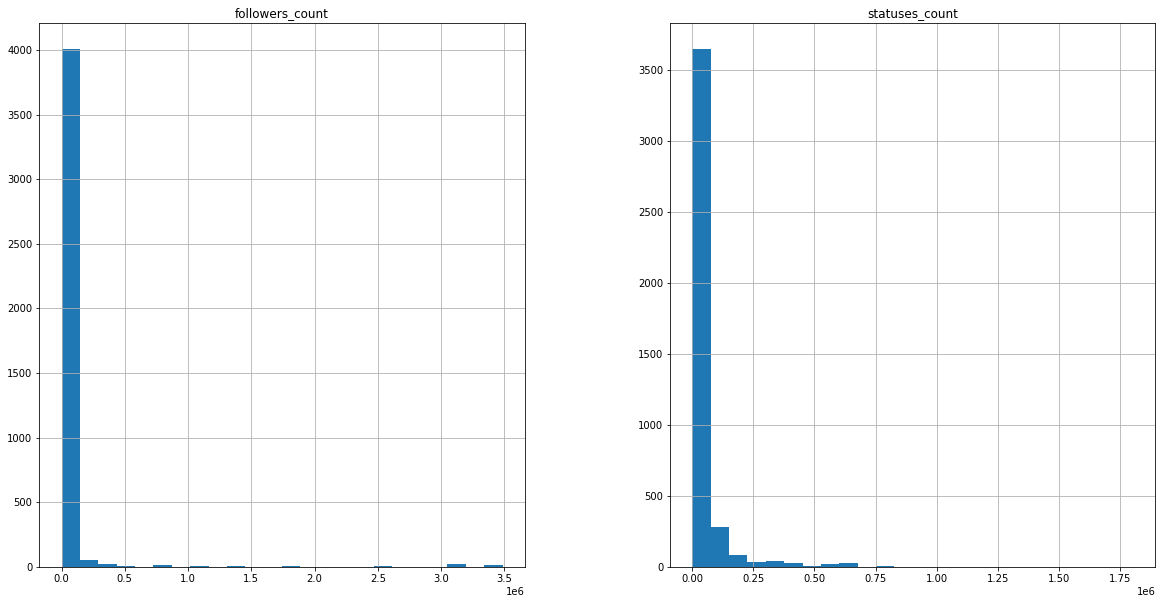

In [86]:
# plotting histograms to visualize patterns in the data

# plotting histograms
eda.hist(figsize = (20,10), bins= 24)
plt.show()

The histograms are unimodal

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'tweets')

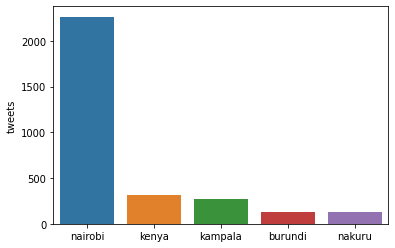

In [87]:
# checking the towns
x= eda.town.value_counts(ascending=False).iloc[:5]
sns.barplot(x.index,x)
plt.gca().set_ylabel('tweets')

Nairobi had the most tweets followed by Nakuru.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


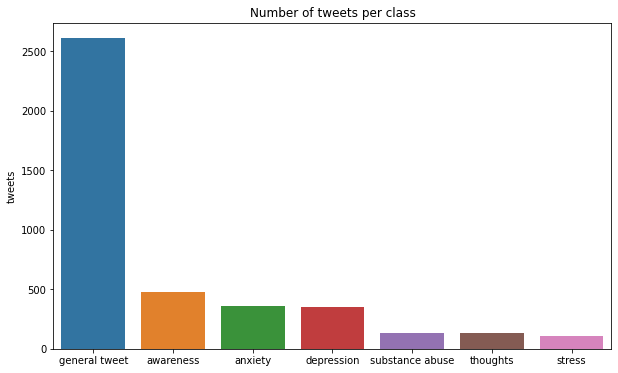

In [88]:
# let us see how the labels are distributed in our dataset
# view data distribution for class imbalance
# checking the class balance of our labels
fig, ax = plt.subplots(figsize=(10,6))
x=eda.label.value_counts()
sns.barplot(x.index,x)
plt.gca().set_ylabel('tweets')
plt.title('Number of tweets per class')
plt.show();

General tweets were the most followed by awareness.

We observe that the most factor that contributes to suicidal thoughts are depression and the least issubstance abuse.

In [89]:
eda['label'].value_counts()

general tweet      2610
awareness           478
anxiety             357
depression          355
substance abuse     134
thoughts            129
stress              109
Name: label, dtype: int64

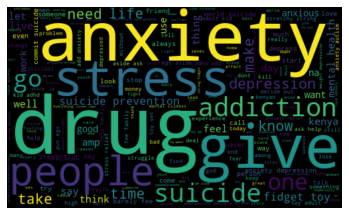

In [91]:
#plotting the wordcount
from wordcloud import WordCloud 

allWords= ''.join( [twts for twts in eda['clean_text']] )
WordCloud= WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allWords)

plt.imshow(WordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

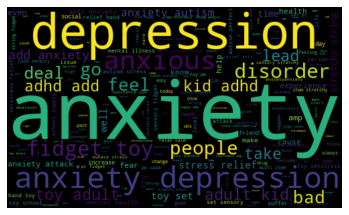

In [92]:
#plotting the wordcount
from wordcloud import WordCloud 
anxiety = eda[eda['label'] == 'anxiety' ]
allWords= ''.join( [twts for twts in anxiety['clean_text']] )
WordCloud= WordCloud(width=500, height=300, random_state=21, max_font_size=119, ).generate(allWords)

plt.imshow(WordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

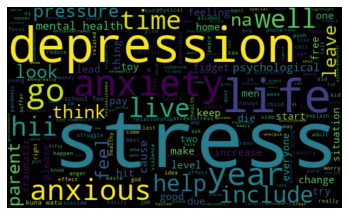

In [93]:
#plotting the wordcount
from wordcloud import WordCloud 
stress = eda[eda['label'] == 'stress' ]
allWords= ''.join( [twts for twts in stress['clean_text']] )
WordCloud= WordCloud(width=500, height=300, random_state=21, max_font_size=119, ).generate(allWords)

plt.imshow(WordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

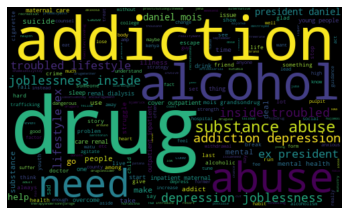

In [94]:
#plotting the wordcount
from wordcloud import WordCloud 
sub_abuse = eda[eda['label'] == 'substance abuse' ]
allWords= ''.join( [twts for twts in sub_abuse['clean_text']] )
WordCloud= WordCloud(width=500, height=300, random_state=21, max_font_size=119, ).generate(allWords)

plt.imshow(WordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

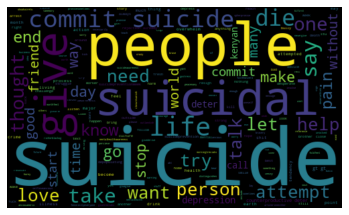

In [95]:
#plotting the wordcount
from wordcloud import WordCloud 
sub_abuse = eda[eda['label'] == 'thoughts' ]
allWords= ''.join( [twts for twts in sub_abuse['clean_text']] )
WordCloud= WordCloud(width=500, height=300, random_state=21, max_font_size=119, ).generate(allWords)

plt.imshow(WordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

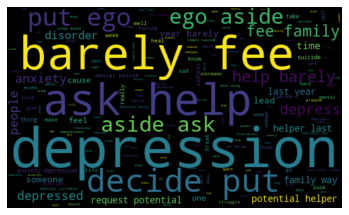

In [96]:
#plotting the wordcount
from wordcloud import WordCloud 
sub_abuse = eda[eda['label'] == 'depression' ]
allWords= ''.join( [twts for twts in sub_abuse['clean_text']] )
WordCloud= WordCloud(width=500, height=300, random_state=21, max_font_size=119, ).generate(allWords)

plt.imshow(WordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

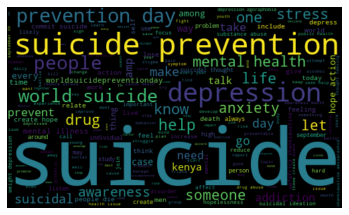

In [97]:
#plotting the wordcount
from wordcloud import WordCloud 
sub_abuse = eda[eda['label'] == 'awareness' ]
allWords= ''.join( [twts for twts in sub_abuse['clean_text']] )
WordCloud= WordCloud(width=500, height=300, random_state=21, max_font_size=119, ).generate(allWords)

plt.imshow(WordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

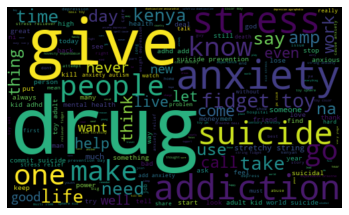

In [98]:
#plotting the wordcount
from wordcloud import WordCloud 
sub_abuse = eda[eda['label'] == 'general tweet' ]
allWords= ''.join( [twts for twts in sub_abuse['clean_text']] )
WordCloud= WordCloud(width=500, height=300, random_state=21, max_font_size=119, ).generate(allWords)

plt.imshow(WordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Time analysis

In [110]:
#loading the dataset
#
df1= pd.read_csv('/content/final_data_suicide-1.csv')
df2= pd.read_excel('/content/final_data_suicide-2.csv.xlsx')
df3= pd.read_excel('/content/final_data_suicide-3.xlsx')

In [112]:
#change create at to date time 
import datetime
df1['created_at'] = pd.to_datetime(df1['created_at'])

df1['date'] = pd.to_datetime(df1['created_at'],format="%Y/%m/%d %H:%M:%S")
df1['year'] = pd.DatetimeIndex(df1['created_at']).year
df1['month'] = pd.DatetimeIndex(df1['created_at']).month
df1['hour'] = pd.DatetimeIndex(df1['created_at']).hour
df1['minute'] = pd.DatetimeIndex(df1['created_at']).minute


In [113]:
#change create at to date time 
import datetime
df2['created_at'] = pd.to_datetime(df2['created_at'])

df2['date'] = pd.to_datetime(df2['created_at'],format="%d-%m-%Y %H:%M")
df2['year'] = pd.DatetimeIndex(df2['created_at']).year
df2['month'] = pd.DatetimeIndex(df2['created_at']).month
df2['hour'] = pd.DatetimeIndex(df2['created_at']).hour
df2['minute'] = pd.DatetimeIndex(df2['created_at']).minute

In [114]:
#change create at to date time 
import datetime
df3['created_at'] = pd.to_datetime(df3['created_at'])

df3['date'] = pd.to_datetime(df3['created_at'],format="%d/%m/%Y %H:%M")
df3['year'] = pd.DatetimeIndex(df3['created_at']).year
df3['month'] = pd.DatetimeIndex(df3['created_at']).month
df3['hour'] = pd.DatetimeIndex(df3['created_at']).hour
df3['minute'] = pd.DatetimeIndex(df3['created_at']).minute

In [127]:
#concatenate the 3 datasets

eda_file= pd.concat([df1, df2, df3], ignore_index=True)

In [128]:
eda_file.head(2)

,Unnamed: 0,friends_count,followers_count,statuses_count,created_at,retweet_count,label,town,clean_text,date,year,month,hour,minute
0,1,182,83,6950,2021-09-14 07:47:00,0,anxiety,burundi,bunmo multi item stretchy string fidget toy pk...,2021-09-14 07:47:00,2021,9,7,47
1,2,983,915,12944,2021-09-14 07:31:00,0,anxiety,kenya,unkonfined basic motivation behind behavior bi...,2021-09-14 07:31:00,2021,9,7,31


In [130]:
eda_file

,Unnamed: 0,friends_count,followers_count,statuses_count,created_at,retweet_count,label,town,clean_text,date,year,month,hour,minute
0,1,182,83,6950,2021-09-14 07:47:00,0,anxiety,burundi,bunmo multi item stretchy string fidget toy pk...,2021-09-14 07:47:00,2021,9,7,47
1,2,983,915,12944,2021-09-14 07:31:00,0,anxiety,kenya,unkonfined basic motivation behind behavior bi...,2021-09-14 07:31:00,2021,9,7,31
2,3,281,63,290,2021-09-14 07:30:00,0,anxiety,nairobi,munenekimathi zablonorina bp normal yes check ...,2021-09-14 07:30:00,2021,9,7,30
3,4,220,2052,37982,2021-09-14 07:02:00,0,anxiety,nairobi kenya,deal anxious share experience anxiety yvonne m...,2021-09-14 07:02:00,2021,9,7,2
4,5,857,272,650,2021-09-14 07:00:00,2,general tweet,nairobi,know dry spell cause anxiety depression even s...,2021-09-14 07:00:00,2021,9,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4162,25,766,19610,47801,2021-09-13 06:20:00,0,awareness,nairobi,school curriculum progs morning social study g...,2021-09-13 06:20:00,2021,9,6,20
4163,46,314,10,81,2021-09-15 13:43:00,0,awareness,nairobi,recovery progression perfection help concern d...,2021-09-15 13:43:00,2021,9,13,43
4164,48,439,116,46,2021-09-14 13:03:00,0,awareness,nakuru,tune thursday listen expert talk addiction dru...,2021-09-14 13:03:00,2021,9,13,3
4165,50,515,272,403,2021-09-13 08:21:00,0,awareness,nairobi,thegunmenhunter thank share kindly explain ena...,2021-09-13 08:21:00,2021,9,8,21


In [131]:
eda_file.shape

(4167, 14)

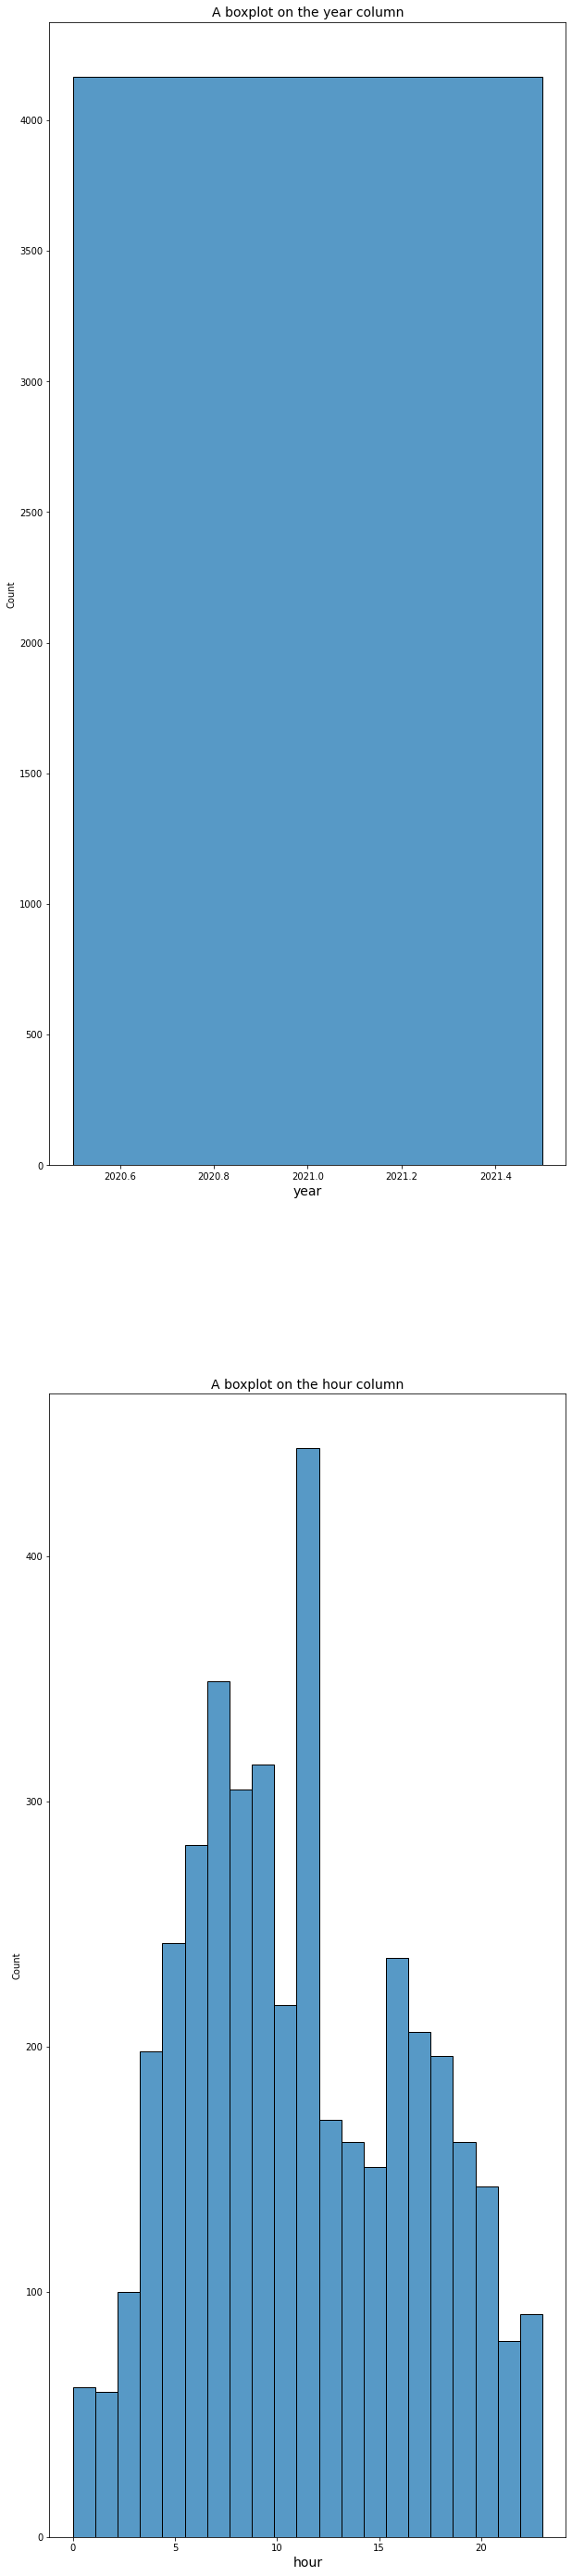

In [132]:
#boxplot for year and hour column
col_names = ['year', 'hour']
fig, ax = plt.subplots(len(col_names), figsize = (10,50))
for i, col_val in enumerate(col_names):

    sns.histplot(x = eda_file[col_val], ax=ax[i])
    ax[i].set_title('A boxplot on the {} column'.format(col_val), fontsize=14)
    ax[i].set_xlabel(col_val, fontsize=14)
plt.show()

Label encoding

In [133]:
# converting type of columns to 'category'
from sklearn.preprocessing import LabelEncoder
eda['label'] = eda['label'].astype('category')

# creating instance of labelencoder
labelencoder = LabelEncoder()
eda['encoded_class'] = labelencoder.fit_transform(eda['label'])
eda

,friends_count,followers_count,statuses_count,created_at,retweet_count,label,town,clean_text,encoded_class
0,182,83,6950,09/14/2021 7:47,0,anxiety,burundi,bunmo multi item stretchy string fidget toy pk...,0
1,983,915,12944,09/14/2021 7:31,0,anxiety,kenya,unkonfined basic motivation behind behavior bi...,0
2,281,63,290,09/14/2021 7:30,0,anxiety,nairobi,munenekimathi zablonorina bp normal yes check ...,0
3,220,2052,37982,09/14/2021 7:02,0,anxiety,nairobi kenya,deal anxious share experience anxiety yvonne m...,0
4,857,272,650,09/14/2021 7:00,2,general tweet,nairobi,know dry spell cause anxiety depression even s...,3
...,...,...,...,...,...,...,...,...,...
4167,726,117,375,07-09-21 8:04,0,depression,bungoma,millicentomanga decide put ego aside ask help ...,2
4168,726,117,375,07-09-21 8:01,0,depression,bungoma,amerix decide put ego aside ask help barely fe...,2
4169,746,756,560,07-09-21 7:04,11,awareness,isiolo,longterm drug effect include depression anxiet...,1
4170,796,228,3694,07-09-21 6:33,1,general tweet,kiambu,itsminabo lenana samorai bennytothedj hio ndio...,3


Visualizing of tweets according to hour

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

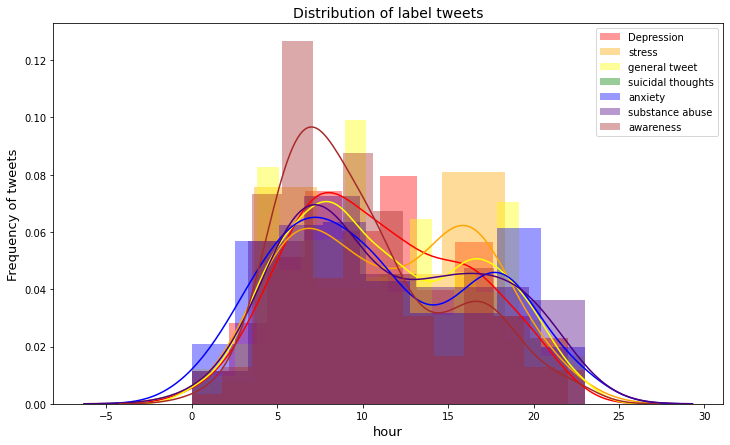

In [134]:
# Plotting histogram to show distribution of suicidal factors as compared to the hour 

one = eda_file.loc[eda_file['label']=='depression', 'hour']     
two = eda_file.loc[eda_file['label']=='stress', 'hour']    
three = eda_file.loc[eda_file['label']=='general tweet', 'hour']   
four = eda_file.loc[eda_file['label']=='suicidal thoughts', 'hour']    
five = eda_file.loc[eda_file['label']=='anxiety', 'hour']    
six = eda_file.loc[eda_file['label']=='substance abuse', 'hour']    
seven = eda_file.loc[eda_file['label']=='awareness', 'hour']    




# Plotting the histograms
#
plt.figure(figsize=(12,7))
sns.distplot(one, color="red", label="Depression")
sns.distplot(two, color="orange", label="stress")
sns.distplot(three, color="yellow", label="general tweet")
sns.distplot(four, color="green", label="suicidal thoughts")
sns.distplot(five, color="blue", label="anxiety")
sns.distplot(six, color="indigo", label="substance abuse")
sns.distplot(seven, color="brown", label="awareness")

plt.title('Distribution of label tweets', fontsize = 14, color = 'k')
plt.xlabel('hour', fontsize = 13, color = 'k')
plt.ylabel('Frequency of tweets', fontsize = 13, color = 'k')
plt.legend()
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


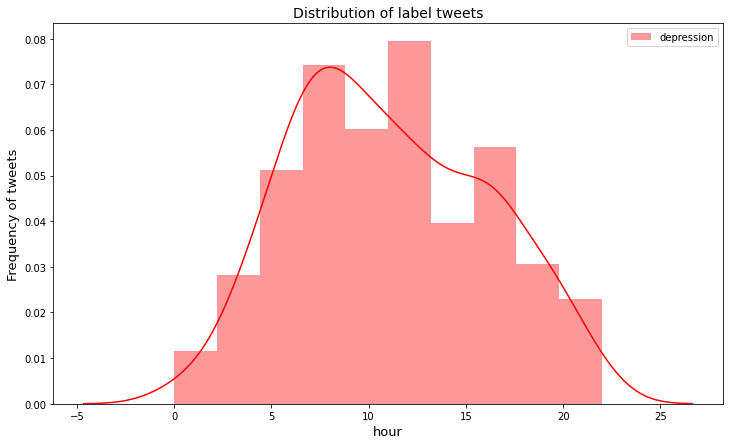

In [135]:
# Plotting the histograms for depression
#
plt.figure(figsize=(12,7))
sns.distplot(one, color="red", label="depression")


plt.title('Distribution of label tweets', fontsize = 14, color = 'k')
plt.xlabel('hour', fontsize = 13, color = 'k')
plt.ylabel('Frequency of tweets', fontsize = 13, color = 'k')
plt.legend()
plt.show()

The most hours that the users tweeted about depression is 7 am - 9 am and with the higest at 11 am- 1 pm 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


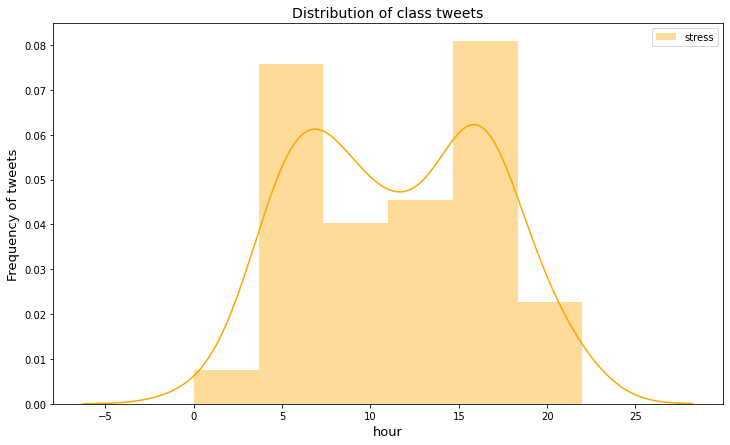

In [136]:
# Plotting the histograms
#
plt.figure(figsize=(12,7))

sns.distplot(two, color="orange", label="stress")

plt.title('Distribution of class tweets', fontsize = 14, color = 'k')
plt.xlabel('hour', fontsize = 13, color = 'k')
plt.ylabel('Frequency of tweets', fontsize = 13, color = 'k')
plt.legend()
plt.show()

The most hours that the users tweeted about stress is 4 am - 7 am and with the higest at 3 pm - 6 pm.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


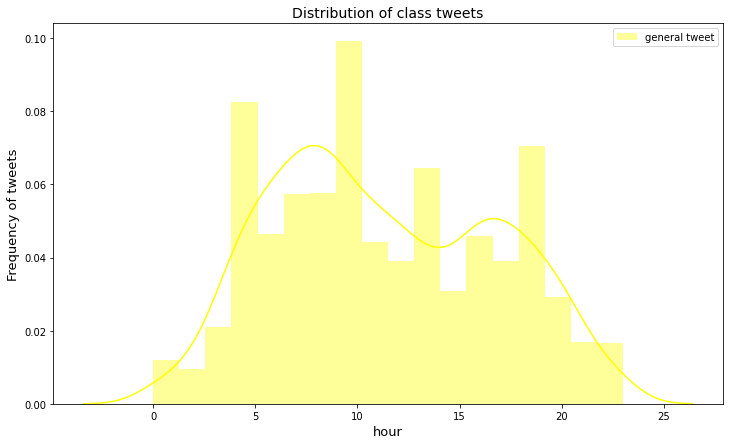

In [137]:
# Plotting the histograms
#
plt.figure(figsize=(12,7))

sns.distplot(three, color="yellow", label="general tweet")


plt.title('Distribution of class tweets', fontsize = 14, color = 'k')
plt.xlabel('hour', fontsize = 13, color = 'k')
plt.ylabel('Frequency of tweets', fontsize = 13, color = 'k')
plt.legend()
plt.show()

The most hours that the users tweeted about general tweet is 8 am - 9 am.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


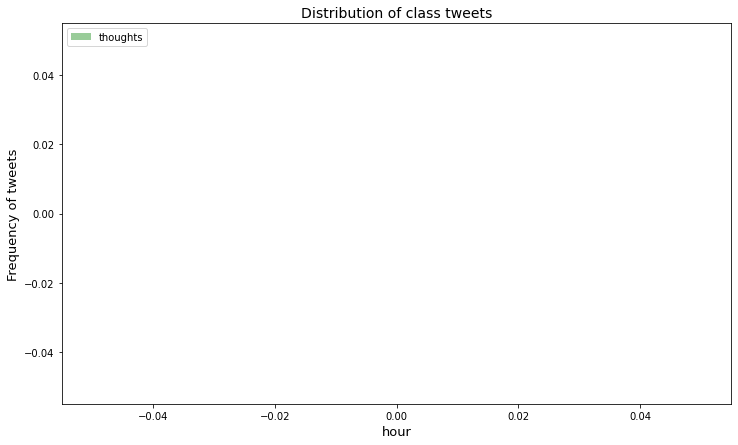

In [142]:
# Plotting the histograms
#
plt.figure(figsize=(12,7))

sns.distplot(four, color="green", label="thoughts")


plt.title('Distribution of class tweets', fontsize = 14, color = 'k')
plt.xlabel('hour', fontsize = 13, color = 'k')
plt.ylabel('Frequency of tweets', fontsize = 13, color = 'k')
plt.legend()
plt.show()

The most hours that the users tweeted about suicidal thoughts is 8 am - 11 am folllowed by 7 pm- 10 pm.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


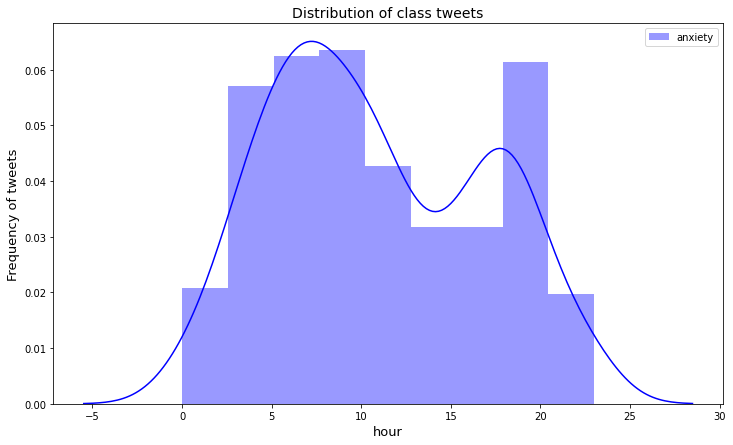

In [139]:
# Plotting the histograms
#
plt.figure(figsize=(12,7))

sns.distplot(five, color="blue", label="anxiety")

plt.title('Distribution of class tweets', fontsize = 14, color = 'k')
plt.xlabel('hour', fontsize = 13, color = 'k')
plt.ylabel('Frequency of tweets', fontsize = 13, color = 'k')
plt.legend()
plt.show()

The most hours that the users tweeted about anxiety is 9 am- 11 am.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


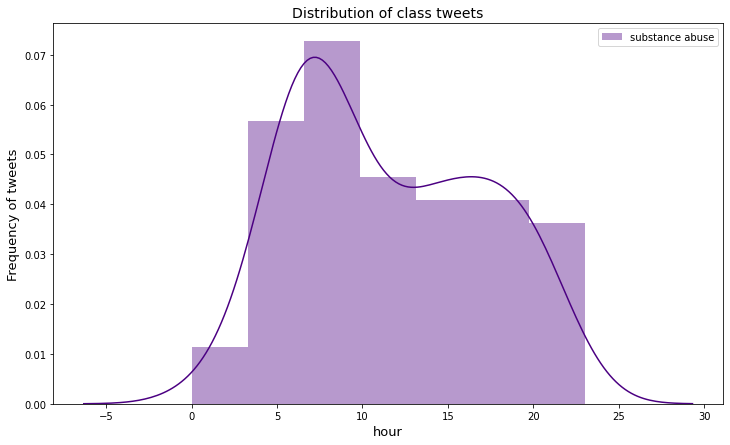

In [140]:
# Plotting the histograms
#
plt.figure(figsize=(12,7))

sns.distplot(six, color="indigo", label="substance abuse")

plt.title('Distribution of class tweets', fontsize = 14, color = 'k')
plt.xlabel('hour', fontsize = 13, color = 'k')
plt.ylabel('Frequency of tweets', fontsize = 13, color = 'k')
plt.legend()
plt.show()

The most hours that the users tweeted about depression is 7 am - 11 am.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


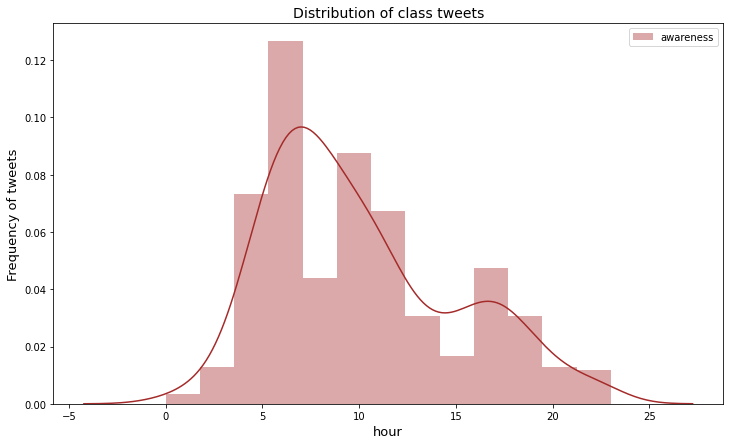

In [141]:
# Plotting the histograms
#
plt.figure(figsize=(12,7))

sns.distplot(seven, color="brown", label="awareness")

plt.title('Distribution of class tweets', fontsize = 14, color = 'k')
plt.xlabel('hour', fontsize = 13, color = 'k')
plt.ylabel('Frequency of tweets', fontsize = 13, color = 'k')
plt.legend()
plt.show()

The most hours that the users tweeted about awareness is 8 am - 9 am.